In [ ]:
from zipfile import ZipFile
file_name = "Face Mask Detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
#!/usr/bin/env python
# coding: utf-8

# **Here we are not splitting data in train test and validation seperately, combining all img in one folder.**
# 

# In[ ]:


'''
1. BASE is base directory i.e dir where data file resides. Inside data file we have train test and validation folder.
2. Master folder name is the directory that have train,test and validaation folder
2. target is a list of all the labels
3. data_map={'filename':code}, filename is the name of directory used for label and 
                                'code' is the code for target.
5. IGNORE_FILE are the files that do not belong to image dataset like csv, md, txt files or any other folder except train, tes,t validation.

folder structure ->
desktop/dataset/train/with_mask/image.jpg
desktop/dataset/train/without_mask/image.jpg

BASE = desktop
DATASET_FOLDER_NAME = dataset
'''


# In[2]:


import os
import cv2
import numpy as np
import time


# In[19]:


def total_files():
    total = 0
    for i in MAIN_DIR:
        train_test_base = os.path.join(BASE, DATASET_FOLDER_NAME, i) #desktop/dataset/train
        train_test_dir = os.listdir(train_test_base) #['with_mask','without_mask']
        for j in train_test_dir:
            labeled_dir_path = os.path.join(train_test_base, j) #desktop/dataset/train/with_mask
            all_img = os.listdir(labeled_dir_path) #['img1.jpg','img2.jpg','img3.jpg'....]
            total += len(all_img)
    print(f'Total files are {total}')


# In[20]:


target = []
data = []
data_map = {
    'with_mask':1,
    'without_mask':0
}
skipped = 0

BASE = ""
DATASET_FOLDER_NAME = '/content/Face Mask Detection Using Computer Vision/Raw Dataset'
IGNORE_FILES = ['README.md']
img_shape = 50


# In[22]:


# MAIN_DIR have folder train,test,validation
MAIN_DIR = os.listdir(os.path.join(BASE, DATASET_FOLDER_NAME))
for ignore_file in IGNORE_FILES:
    MAIN_DIR.remove(ignore_file)
    
total_files()
for i in MAIN_DIR:
    train_test_base = os.path.join(BASE, DATASET_FOLDER_NAME, i) #desktop/dataset/train
    train_test_dir = os.listdir(train_test_base) #['with_mask','without_mask']
    for j in train_test_dir:
        labeled_dir_path = os.path.join(train_test_base, j) #desktop/dataset/train/with_mask
        all_img = os.listdir(labeled_dir_path) #['img1.jpg','img2.jpg','img3.jpg'....]
        print(f'\nExecuting - {i}/{j}')
        for k in all_img:
            image_path = os.path.join(labeled_dir_path, k)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            try:
                # resizing to (50 x 50)
                image = cv2.resize(image,(img_shape,img_shape))
            except Exception as E:
                skipped += 1
                print(E)
                continue
            data.append(image)
            target.append(data_map[j])
print(f'\n{skipped} files skipped.')

with open(r'/content/Face Mask Detection Using Computer Vision/Training/data.npy','wb') as file:
    np.save(file,np.array(data))
    print('\nData file saved.')
    
with open(r'/content/Face Mask Detection Using Computer Vision/Training/target.npy','wb') as file:
    np.save(file,np.array(target))
    print('Target file saved.')

print('\nFinished')
time.sleep(120) #sleep(6000)






Total files are 1651

Executing - val/with_mask

Executing - val/without_mask

Executing - train/with_mask

Executing - train/without_mask

Executing - test/with_mask

Executing - test/without_mask

0 files skipped.

Data file saved.
Target file saved.

Finished


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [ ]:
data = np.load('/content/Face Mask Detection Using Computer Vision/Training/data.npy')

In [ ]:
target = np.load('/content/Face Mask Detection Using Computer Vision/Training/target.npy')
target = tf.keras.utils.to_categorical(target) # converting [1,0,1,1,0...] to [[1,0],[0,1],[1,0]] i.e categorical
target

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

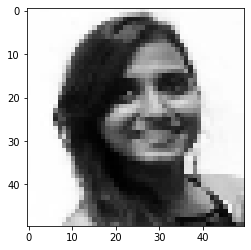

In [ ]:
plt.imshow(data[890],cmap='gray')

In [ ]:
target[890]

array([1., 0.], dtype=float32)

In [ ]:
# we need to create a 3D image since our image have only one channel as its a greyscale img.
# so we will just replicate the image 3 times to create a 3d image.
# https://www.tensorflow.org/api_docs/python/tf/image/grayscale_to_rgb
# why RESHAPE - https://github.com/tensorflow/tensorflow/issues/26324 
# preprocessing
odata = data.copy()
ndata = []
for i in odata:
    image = i.reshape((*i.shape,1)) # as tf.image.grayscale_to_rgb requires last dimension to be 1, see why reshape link
    image = tf.convert_to_tensor(image)  # as tf.image.grayscale_to_rgb requires tensor for processing.
    ndata.append(tf.image.grayscale_to_rgb(image).numpy()/255.)

data = ndata.copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
np.shape(data)

(1651, 50, 50, 3)

In [ ]:
trainx, testx, trainy, testy = train_test_split(data,
                                                target,
                                                test_size=0.15,
                                                random_state=345,
                                                shuffle=True)

trainx = np.array(trainx)
testx = np.array(testx)

In [ ]:
trainy.shape

(1403, 2)

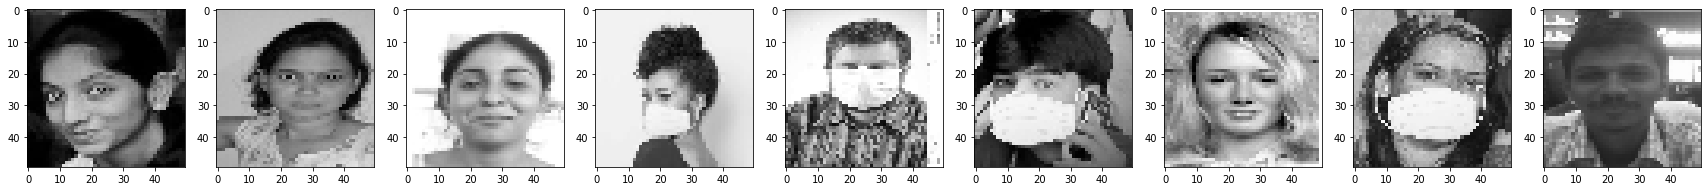

In [ ]:
plt.figure(figsize=[30,30])
for i in np.arange(1,10):
    plt.subplot(int(f"19{i}"))
    plt.imshow(trainx[np.random.randint(0,1403)], cmap='gray')

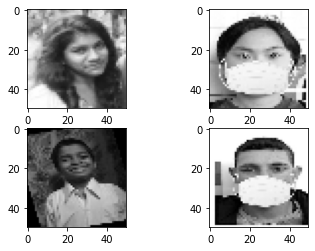

In [ ]:
plt.subplot(221)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(222)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(223)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(224)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')

In [ ]:
trainy[0]


array([0., 1.], dtype=float32)

In [ ]:
img_shape = trainx[0].shape
img_shape  

(50, 50, 3)

In [ ]:
model=Sequential()

model.add(layers.Conv2D(32,(3,3),input_shape=img_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories


adam = tf.keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
activation (Activation)      (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
activation_1 (Activation)    (None, 9, 9, 128)         0

In [ ]:
history = model.fit(x=trainx,
                    y=trainy,
                    batch_size=100,
                    epochs=50,          #epoch=50
                    validation_split=0.2,
                    verbose=2,
                    shuffle=True)

Epoch 1/50
12/12 - 5s - loss: 0.6958 - accuracy: 0.5303 - val_loss: 0.6689 - val_accuracy: 0.5053
Epoch 2/50
12/12 - 4s - loss: 0.6504 - accuracy: 0.6221 - val_loss: 0.5371 - val_accuracy: 0.8541
Epoch 3/50
12/12 - 4s - loss: 0.5109 - accuracy: 0.7745 - val_loss: 0.3577 - val_accuracy: 0.8683
Epoch 4/50
12/12 - 4s - loss: 0.3651 - accuracy: 0.8601 - val_loss: 0.4095 - val_accuracy: 0.8185
Epoch 5/50
12/12 - 4s - loss: 0.3198 - accuracy: 0.8779 - val_loss: 0.3431 - val_accuracy: 0.8612
Epoch 6/50
12/12 - 4s - loss: 0.2456 - accuracy: 0.9100 - val_loss: 0.1969 - val_accuracy: 0.9253
Epoch 7/50
12/12 - 4s - loss: 0.1641 - accuracy: 0.9421 - val_loss: 0.1819 - val_accuracy: 0.9395
Epoch 8/50
12/12 - 4s - loss: 0.1485 - accuracy: 0.9492 - val_loss: 0.1782 - val_accuracy: 0.9359
Epoch 9/50
12/12 - 4s - loss: 0.1368 - accuracy: 0.9474 - val_loss: 0.2041 - val_accuracy: 0.9359
Epoch 10/50
12/12 - 4s - loss: 0.1313 - accuracy: 0.9572 - val_loss: 0.1750 - val_accuracy: 0.9466
Epoch 11/50
12/12 -

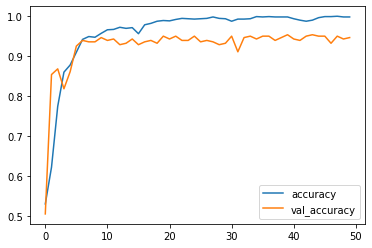

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])

In [ ]:
model.evaluate(testx, testy)

8/8 [==============================] - 0s 30ms/step - loss: 0.1675 - accuracy: 0.9718


[0.16750440001487732, 0.9717742204666138]

In [ ]:
model.save('cnn.h5')

In [ ]:
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
model = keras.models.load_model(r'cnn.h5')
model

In [ ]:
a = (50,50,3)
b = [1,*a]
b

[1, 50, 50, 3]

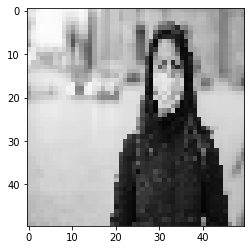

In [ ]:
img_path = '/content/Face Mask Detection Using Computer Vision/Classification/masked_person.jpg'

master_I= cv2.imread(img_path)
master_I = cv2.cvtColor(master_I,cv2.COLOR_BGR2RGB)
orig_image = cv2.cvtColor(master_I, cv2.COLOR_RGB2GRAY)
image = cv2.resize(orig_image,(50,50))
image = image.reshape((*image.shape,1)) # as tf.image.grayscale_to_rgb requires last dimension to be 1, see why reshape link
image = tf.convert_to_tensor(image)  # as tf.image.grayscale_to_rgb requires tensor for processing.
image = tf.image.grayscale_to_rgb(image).numpy()/255. # .numpy will convert dtype to numpy from tf
# we need to reshape image to [batch_size, row, col, channel] to feed it to model for prediction
final_image = image.reshape(1, *image.shape) #https://stackoverflow.com/questions/56874677/transform-3d-tensor-to-4d

plt.imshow(final_image[0],cmap='gray')

In [ ]:
final_image[0].shape

(50, 50, 3)

In [ ]:
model.predict(final_image)

array([[0.00352484, 0.99647516]], dtype=float32)

In [ ]:
is_mask = tf.math.argmax(model.predict(final_image),1).numpy()[0] # it gives the index value of maximum
is_mask

1

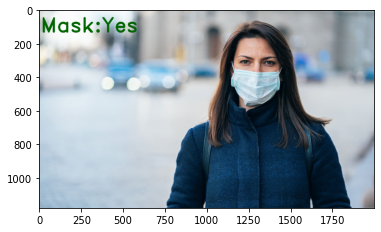

In [ ]:
def mask(img):
    if is_mask:
        plt.imshow(cv2.putText(img,
                    'Mask:Yes', (10,130),
                    fontFace=cv2.FONT_HERSHEY_DUPLEX,
                    fontScale=4,
                    color=(0,100,0),thickness=7))
    else:
        plt.imshow(img)
        
mask(master_I)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np
model = keras.models.load_model(r'cnn.h5')
model

In [ ]:
# master_I is the frame
def check_mask(master_I):
    
    mask_status = {
        0:'No',
        1:'Yes'
    }
    orig_image = cv2.cvtColor(master_I, cv2.COLOR_RGB2GRAY)
    is_mask=0
    
    try:
        # preprocessing
        image = cv2.resize(orig_image,(50,50))
        image = image.reshape((*image.shape,1))
        image = tf.convert_to_tensor(image)
        image = tf.image.grayscale_to_rgb(image).numpy()/255. # to scale image from 0 to 1
        final_image = image.reshape(1, *image.shape)
        is_mask = tf.math.argmax(model.predict(final_image),1).numpy()[0]
        #         print(model.predict(final_image))
        
        
        


    except Exception as E:
        print(E)
    else:   
        master_I = cv2.putText(master_I,
                    f'Mask:{mask_status[is_mask]}', (10,50),
                    fontFace=cv2.FONT_HERSHEY_DUPLEX,
                    fontScale=1,
                    color=(0,0,255),thickness=2)
        

    return (master_I,is_mask)

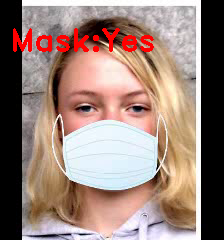

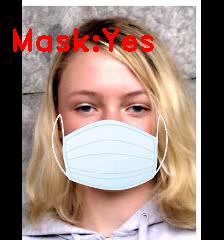

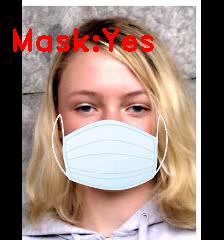

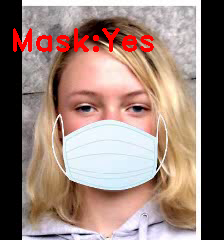

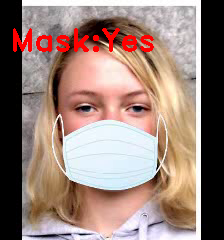

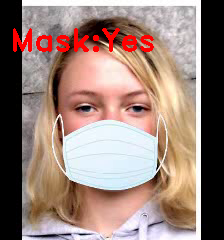

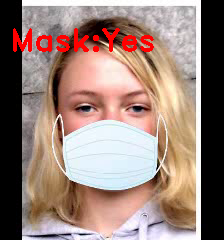

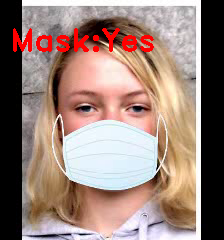

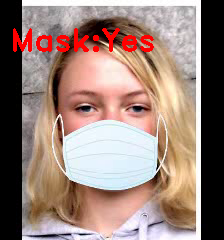

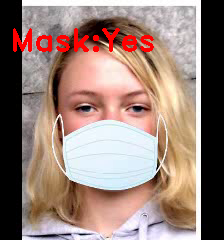

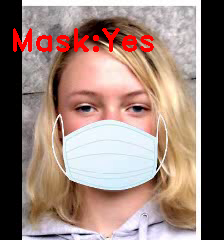

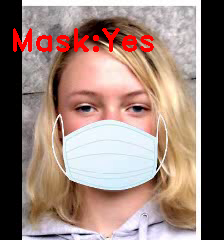

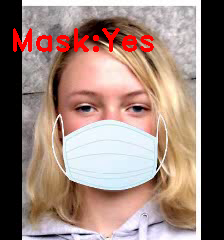

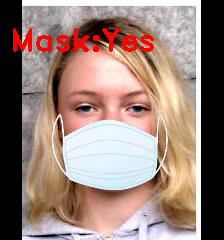

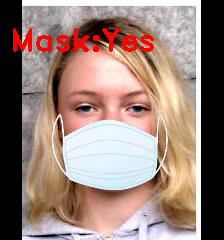

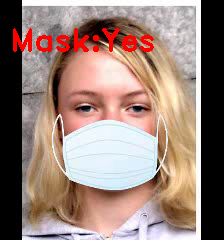

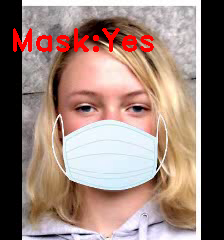

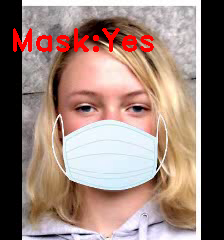

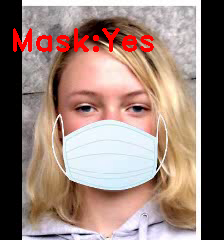

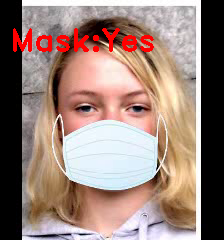

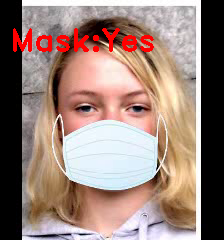

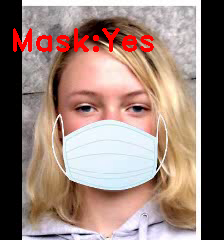

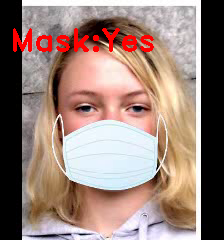

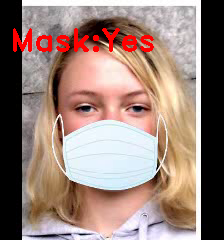

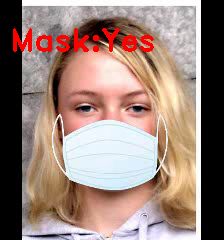

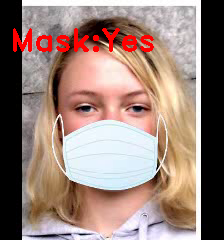

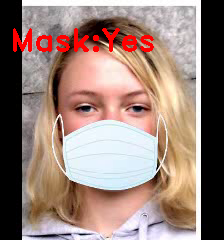

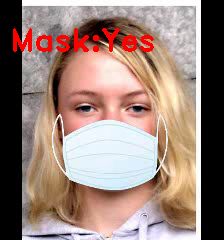

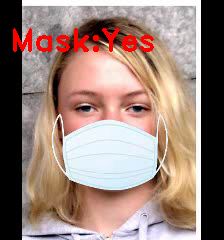

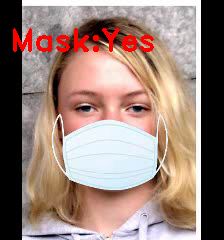

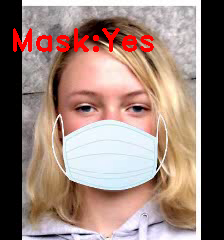

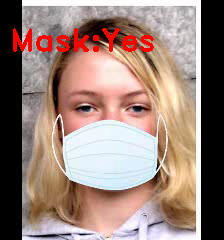

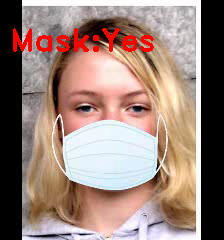

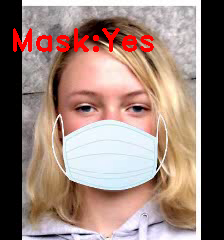

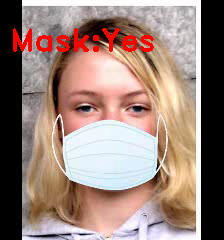

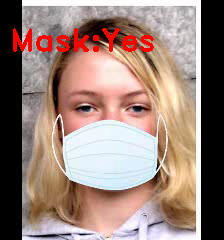

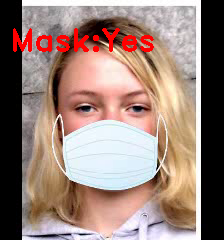

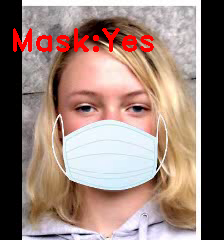

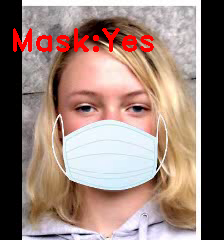

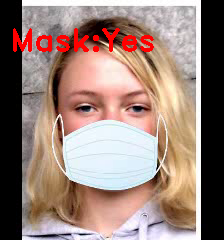

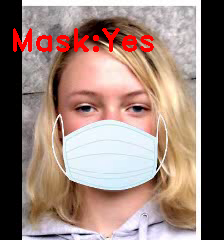

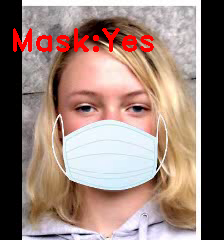

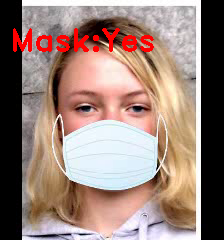

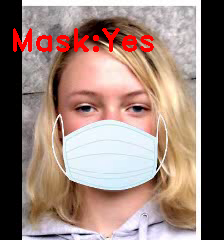

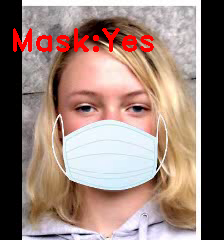

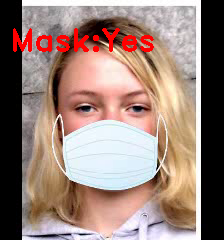

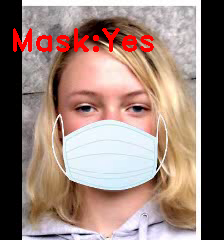

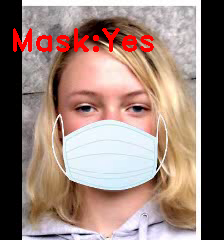

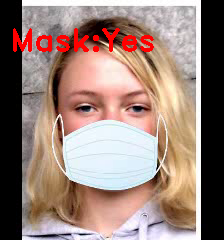

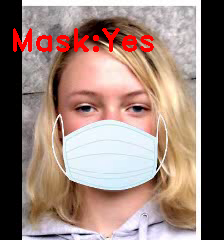

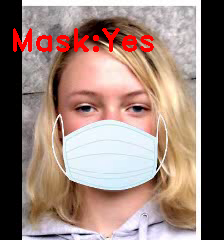

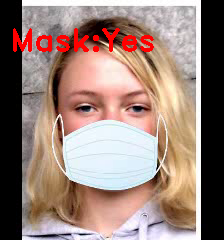

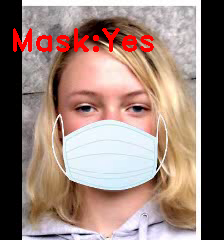

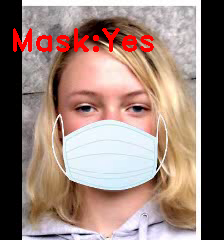

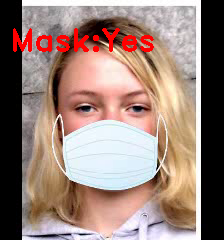

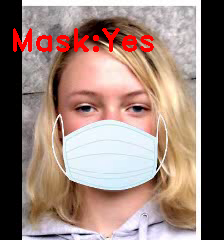

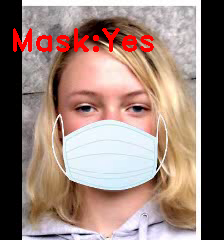

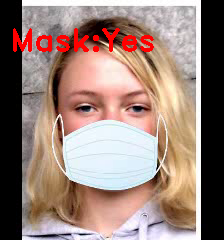

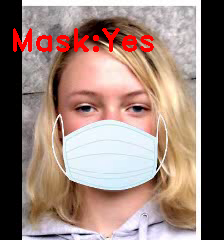

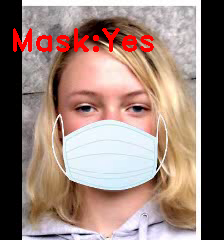

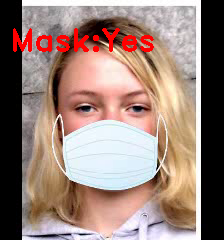

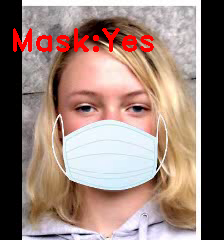

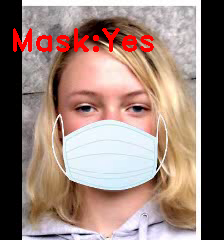

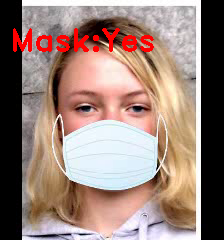

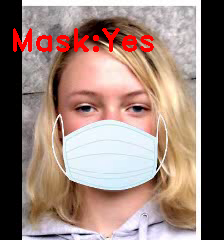

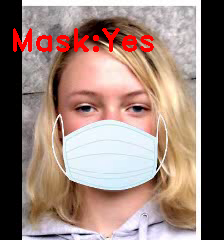

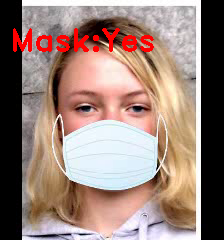

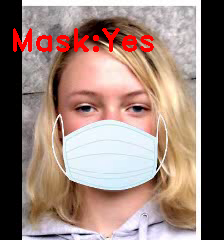

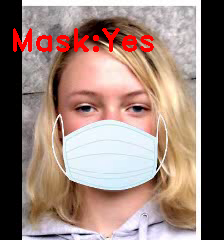

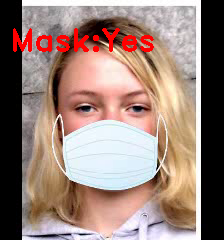

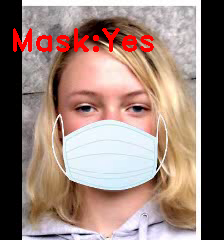

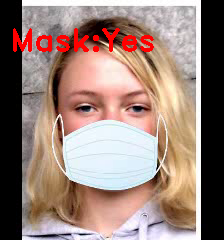

In [ ]:
#cap = cv2.VideoCapture(0) #live

from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture('selfie1.mp4')
tup=()

if not cap.isOpened():
    print("There is an error in loading video file.")

while(1):
    ret, frame = cap.read()
    if ret: #ret is TRUE only till video can be read
        time.sleep(1/cap.get(cv2.CAP_PROP_FPS)) # to get the fps of video
        tup = check_mask(frame)
        cv2_imshow(tup[0])
        k=cv2.waitKey(1)
        if(k==27):
          break
    else:
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
ImgFileName='mp.jpg'

In [ ]:
import os
import smtplib
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from email.mime.multipart import MIMEMultipart

In [ ]:
def SendMail(ImgFileName):
    img_data = open(ImgFileName,'rb').read()
    msg = MIMEMultipart()
    msg['Subject'] = 'PANDEMIC ALERT!!!!!!!!!!!!!!!!'  

     
    From = 'minorproject.team12@gmail.com'
    To = 'nithyashree107@gmail.com'

    msg['From'] = 'minorproject.team12@gmail.com'
    msg['To'] = 'nithyashree107@gmail.com'

    text = MIMEText("""\

       

          An intruder is at the gate without wearing a face mask.

          Your organization could be vulnerable to the deadly COVID-19 PANDEMIC.

          Hurry Up and STOP them."""      
    )

    msg.attach(text)
    image = MIMEImage(img_data, name=os.path.basename(ImgFileName))
    msg.attach(image)

    s = smtplib.SMTP("smtp.gmail.com", 587)

    s.ehlo()
    s.starttls()
    s.ehlo()
    s.login("minorproject.team12@gmail.com","team12@123")
    s.sendmail(From, To, msg.as_string())
    s.quit()

In [ ]:
if(tup[1]==0):
  SendMail(ImgFileName)

In [ ]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

In [ ]:
organization=[cv2.imread('EMP-00.jpg'),
              cv2.imread('EMP-01.jpg'),
              cv2.imread('EMP-03.jpg'),
              cv2.imread('EMP-49.jpg'),
              cv2.imread('EMP-51.jpg'),
              cv2.imread('EMP-73.jpg'),
              cv2.imread('EMP-91.jpg'),
              cv2.imread('EMP-05.jpg'),
              cv2.imread('EMP-10.jpg'),
              cv2.imread('EMP-100.jpg')
              ]

empid=['EMP-00','EMP-01','EMP-03','EMP-49','EMP-51','EMP-73','EMP-91','EMP-05']
employees=["Dev Dixit","Manoj Basu","Clara Williams","Narmada Sridharan","Elizabeth Winslet","Carolyne Stevenson","Hritik Sharma","Priya Prakash"]

In [ ]:
def reshapeImage(image_name):
  img=cv2.imread(image_name)
  width=400
  height=400
  dim=(width,height)   
  resized=cv2.resize(img,dim,interpolation=cv2.INTER_AREA)
  from google.colab.patches import cv2_imshow

  #print(resized.shape)
  return resized


In [ ]:
len(organization)

8

In [ ]:
organization[0]=reshapeImage('EMP-00.jpg')
organization[1]=reshapeImage('EMP-01.jpg')
organization[2]=reshapeImage('EMP-03.jpg')
organization[3]=reshapeImage('EMP-05.jpg')
organization[4]=reshapeImage('EMP-49.jpg')
organization[5]=reshapeImage('EMP-51.jpg')
organization[6]=reshapeImage('EMP-73.jpg')
organization[7]=reshapeImage('EMP-91.jpg')
organization[8]=reshapeImage('EMP-10.jpg')
organization[9]=reshapeImage('EMP-100.jpg')

In [ ]:
import os
import smtplib
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from email.mime.multipart import MIMEMultipart

In [ ]:
def SendMail2(ImgFileName):
    img_data = open(ImgFileName,'rb').read()
    msg = MIMEMultipart()
    msg['Subject'] = 'ORGANIZATION SECURITY ALERT!!!!!!!!!!!!!!!!'  

     
    From = 'minorproject.team12@gmail.com'
    To = 'nithyashree107@gmail.com'

    msg['From'] = 'minorproject.team12@gmail.com'
    msg['To'] = 'nithyashree107@gmail.com'

    text = MIMEText("""\

       Respected Security,

              An intruder is at your organization's gate.

              The system has successfully recognized him/her to not be belonging to your organization.

              The mail has also enclosed a photo of this intruder.

              Kindly take necessary actions and save your organization.

                                        Thank You,
    
    
    
    """)
    msg.attach(text)
    image = MIMEImage(img_data, name=os.path.basename('nithya.jpeg'))
    msg.attach(image)

    s = smtplib.SMTP("smtp.gmail.com", 587)

    s.ehlo()
    s.starttls()
    s.ehlo()
    s.login("minorproject.team12@gmail.com","team12@123")
    s.sendmail(From, To, msg.as_string())
    s.quit()

In [ ]:




def maskedIntruderMail(ImgFileName):
  duplicate = reshapeImage(ImgFileName)

  for i in range(0,len(organization)):
    if(organization[i].shape == duplicate.shape):
      difference = cv2.subtract(organization[i], duplicate)
      b, g, r = cv2.split(difference)


      if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
          print("Belongs to organization")
          print("||||||","EMPLOYEE-ID:",empid[i],"|||||","EMPLOYEE NAME:",employees[i],"|||||||")
          cv2_imshow(duplicate)
          cv2.waitKey(0)
          cv2.destroyAllWindows()

          
          return


  print("UNKNOWN")
  SendMail2(ImgFileName)    
  
		
#cv2_imshow(original)

  cv2_imshow(duplicate)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

Belongs to organization
|||||| EMPLOYEE-ID: EMP-73 ||||| EMPLOYEE NAME: Carolyne Stevenson |||||||


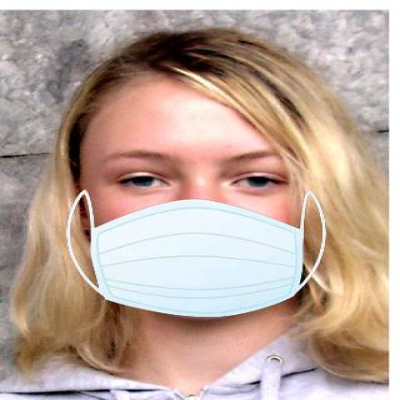

In [ ]:
if(tup[1]==1):
  maskedIntruderMail(ImgFileName)